# Project - EDA with Pandas Using the Ames Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains housing values in the suburbs of Ames.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file ``ames_train.csv``) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions
Look in ``data_description.txt`` for a full description of all variables.

A preview of some of the columns:

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

**YrSold**: Year Sold (YYYY)

**SalePrice**: Sale price of the house in dollars

In [1]:
# Let's get started importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the data
df = pd.read_csv('ames_train.csv')

In [5]:
# Investigate the Data
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


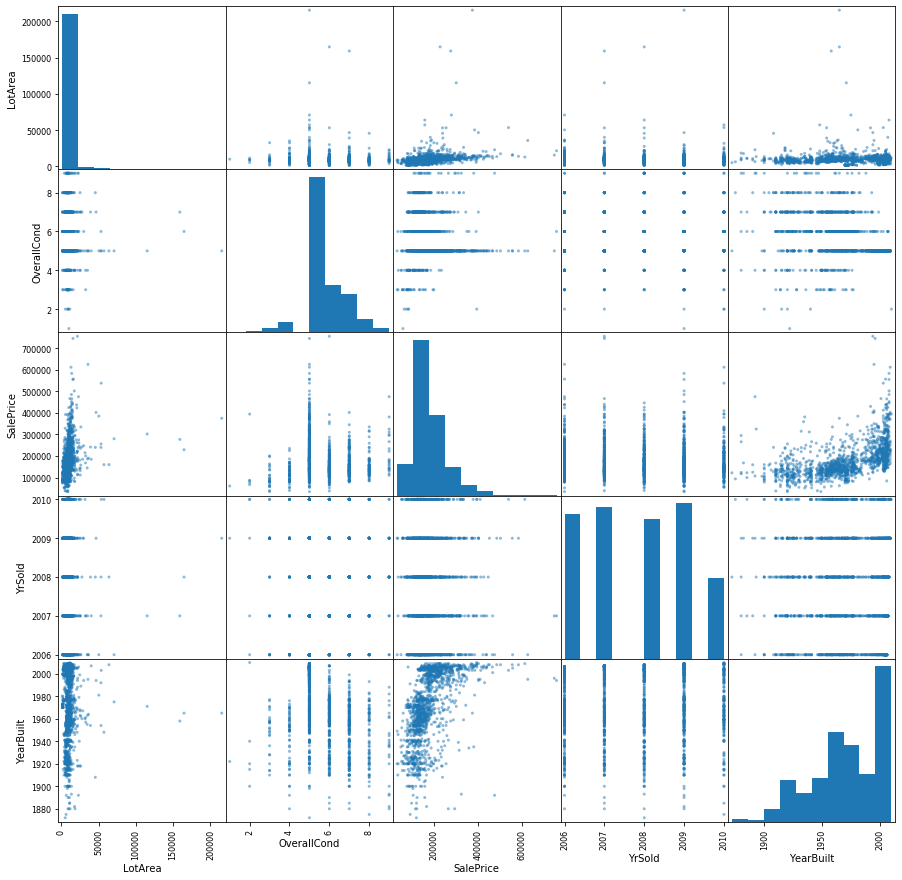

In [8]:
# Investigating Distributions using scatter_matrix
pd.plotting.scatter_matrix(df[['LotArea', 'OverallCond', 'SalePrice', 'YrSold', 'YearBuilt']], figsize=(15,15));

Text(0, 0.5, 'Number of Houses Sold')

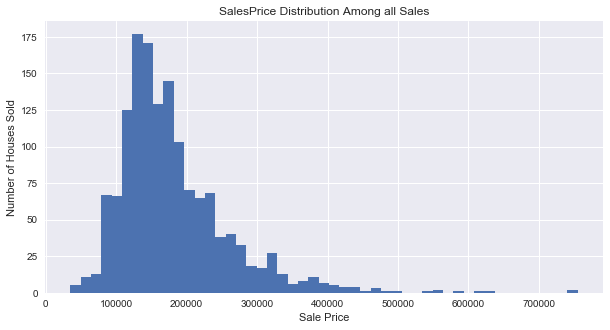

In [37]:
# Create a plot that shows the SalesPrice Distribution
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(df['SalePrice'], bins = 'auto')
ax.set_title('SalesPrice Distribution Among all Sales')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Number of Houses Sold')

Text(0, 0.5, 'Number of Houses')

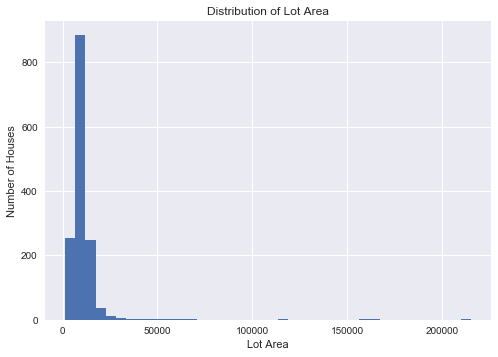

In [31]:
# Create a plot that shows the LotArea Distribution
lotdis = df['LotArea'].plot.hist(bins = 40)
lotdis.set_title('Distribution of Lot Area')
lotdis.set_xlabel('Lot Area')
lotdis.set_ylabel('Number of Houses')

Text(0, 0.5, 'Number of Houses')

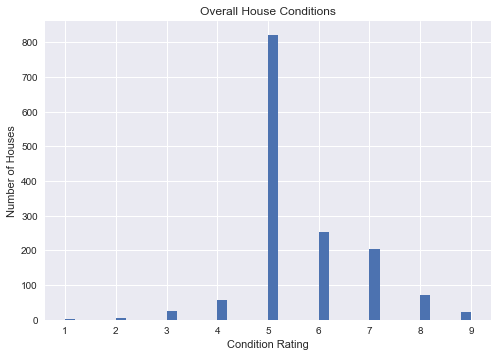

In [33]:
# Create a plot that shows the Distribution of the overall house condition
housecond = df['OverallCond'].plot.hist(bins = 40)
housecond.set_title('Overall House Conditions')
housecond.set_xlabel('Condition Rating')
housecond.set_ylabel('Number of Houses')

Text(0, 0.5, 'Price')

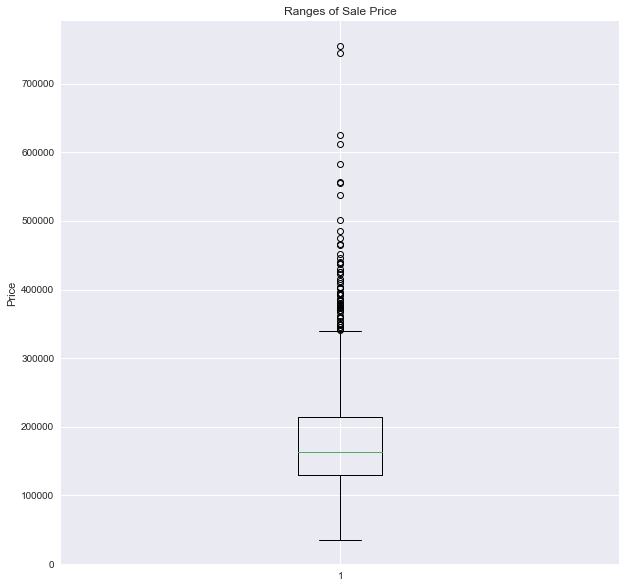

In [41]:
# Create a Box Plot for SalePrice
fig, ax = plt.subplots(figsize = (10,10))
ax.boxplot(df['SalePrice'])
ax.set_title('Ranges of Sale Price')
ax.set_ylabel('Price')

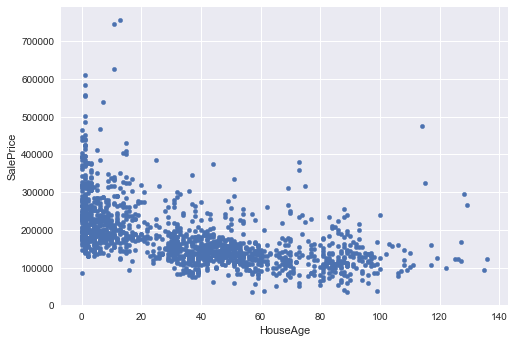

In [54]:
# Perform an Exploration of home values by age
df['HouseAge'] = df['YrSold']-df['YearBuilt']
#df.loc[:,'YearBuilt':'HouseAge']
#df['HouseAge'].unique()
df.plot.scatter('HouseAge', 'SalePrice')

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!